In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
!pip install pandas numpy scikit-learn transformers

In [ ]:
!pip install -U transformers tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [ ]:
!pip install -U transformers


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf



Loading the data:

In [ ]:
df = pd.read_csv('/content/combinednlpcat.csv')

In [ ]:
# delete all the duplicated rows by keeping the first one and droping the rest
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

df = df.drop_duplicates(keep='first')
df

,news_ID,clean_text,category
0,NID_2023-01-19-02_3182,Forscher sehen enorm Aufholbedarf bei CO2 Entn...,Wissenschaft
1,NID_2023-01-19-04_5957,Museum Winsen Wie ein klein Museum groß Idee u...,Lkr. Harburg
2,NID_2023-01-19-04_6983,quartier in Harburg der neu Kümmerer beziehen ...,Harburg
3,NID_2023-01-19-04_3777,Grundsteuer Frist für Steuererklärung laufen a...,Norderstedt
4,NID_2023-01-19-06_4993,Kreis Pinneberg Elmshorn legen sein Vision der...,Pinneberg
...,...,...,...
985820,NID_2023-02-04-00_13776,Tagebuch in dies groß Zeit Björn Höcke in ein ...,Feuilleton
985821,NID_2023-02-04-00_3506,Digitales irgendwas passieren Berliner Festiva...,Feuilleton
985822,NID_2023-02-04-00_5566,Gedicht zeigen gut Nachricht der Glühbirne sei...,Feuilleton
985823,NID_2023-02-04-00_12457,schon laufen Nachschlag Zündnadeljets seit fas...,Feuilleton


In [ ]:
# Remove rows where 'category' is NaN

total_rows = df.shape[0]
missing_rows = df['category'].isna().sum()
missing_percentage = (missing_rows / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Missing rows in 'category': {missing_rows}")
print(f"Percentage of missing data in 'category': {missing_percentage:.2f}%")

# Assuming df is your DataFrame
print("Original number of rows:", df.shape[0])

# Remove rows where 'category' is NaN
df = df.dropna(subset=['category'])
print("Number of rows after removing missing values:", df.shape[0])

Total rows: 985738
Missing rows in 'category': 856
Percentage of missing data in 'category': 0.09%
Original number of rows: 985738
Number of rows after removing missing values: 984882


In [ ]:
#Read the data
df.head()
print('Shape of original dataset:',df.shape)
unique_values = df['category'].nunique()
print('total number of categories is :',unique_values)

Shape of original dataset: (984882, 3)
total number of categories is : 69808


In [ ]:
df.isnull().sum()

,0
news_ID,0
clean_text,0
category,0


In [ ]:
value_counts = df['category'].value_counts()
value_counts


,count
category,
News,26432
Politik,26420
Sport,19741
Wirtschaft,19313
NRW,18700
...,...
Elmshorn Fighting Pirates,1
Baumgart Klaus,1
Prostata-Operation,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984882 entries, 0 to 985824
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   news_ID     984882 non-null  object
 1   clean_text  984882 non-null  object
 2   category    984882 non-null  object
dtypes: object(3)
memory usage: 30.1+ MB


In [ ]:
#extracting the top 30 frequent categories
top_categories = df['category'].value_counts().head(10)
print(top_categories)

category
News           26432
Politik        26420
Sport          19741
Wirtschaft     19313
NRW            18700
Lokales        17849
free           14954
Städte         13538
Deutschland     8652
Panorama        8440
Name: count, dtype: int64


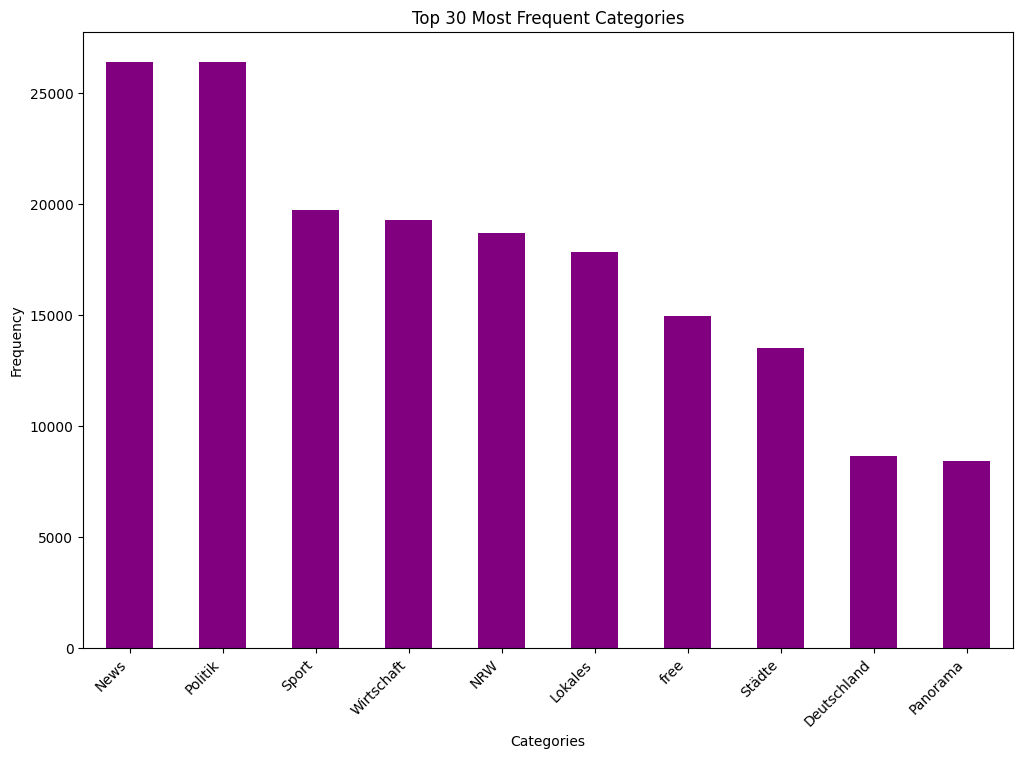

In [ ]:
# Create a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))  # Set figure size
top_categories.plot(kind='bar', color='purple')
plt.title('Top 30 Most Frequent Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.show()

Pre Processing :

In [ ]:
import pandas as pd
from sklearn.utils import resample

def preprocess_and_balance(df,
                           text_column='clean_text',
                           label_column='category',
                           target_count=5000,
                           top_n_categories=30):
    """
    Preprocess the dataset by converting text to lowercase and balancing the top N categories.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the dataset with text and label columns.
    - text_column (str): The name of the column containing the text data.
    - label_column (str): The name of the column containing the label/category.
    - target_count (int): The target number of samples for each category to balance.
    - top_n_categories (int): Number of top categories to balance.

    Returns:
    - pd.DataFrame: A balanced DataFrame with text converted to lowercase.
    """

    # Convert text to lowercase (using .loc to avoid SettingWithCopyWarning)
    df2 = df.copy()  # Create a copy to avoid modifying the original DataFrame
    df2.loc[:, text_column] = df2[text_column].str.lower()

    # Get the top N categories by frequency
    top_categories = df2[label_column].value_counts().nlargest(top_n_categories).index

    # Filter dataset to include only the top N categories
    df_top = df2[df2[label_column].isin(top_categories)]

    # Initialize a list to store balanced data
    balanced_data = []

    # For each category in top N categories, apply resampling
    for category in top_categories:
        category_data = df_top[df_top[label_column] == category]

        # If the category has fewer samples than target_count, oversample
        if len(category_data) < target_count:
            category_data_resampled = resample(
                category_data,
                replace=True,  # Oversample by allowing duplicates
                n_samples=target_count,
                random_state=42
            )
        # If the category has more samples than target_count, undersample
        else:
            category_data_resampled = resample(
                category_data,
                replace=False,  # Undersample without duplicates
                n_samples=target_count,
                random_state=42
            )

        # Append the resampled data
        balanced_data.append(category_data_resampled)

    # Concatenate all balanced data into a single DataFrame
    balanced_df = pd.concat(balanced_data).reset_index(drop=True)

    return balanced_df


Choosing number of rows:

In [ ]:
# Choose the number of inputs
target_count=100000

In [ ]:
balanced_df = preprocess_and_balance(df,
                                     text_column='clean_text',
                                     label_column='category',
                                     target_count=target_count,
                                     top_n_categories=10)

# Check class distribution in the balanced dataset
print(balanced_df['category'].value_counts())
balanced_df.head()

category
News           100000
Politik        100000
Sport          100000
Wirtschaft     100000
NRW            100000
Lokales        100000
free           100000
Städte         100000
Deutschland    100000
Panorama       100000
Name: count, dtype: int64


,news_ID,clean_text,category
0,NID_2023-01-17-20_6927,in der iran weichen der angst der verachtung a...,News
1,NID_2023-02-18-10_4867,kampf um gold ein duell shiffrin holdener wend...,News
2,NID_2023-02-06-12_6700,in regensburg geflohen mörder zurück in bayern...,News
3,NID_2023-02-14-20_4758,faschingsfinal bezirk mödling ballsaison bring...,News
4,NID_2023-01-05-05_7308,landesklinikum mödling weg sein umsonst termin...,News


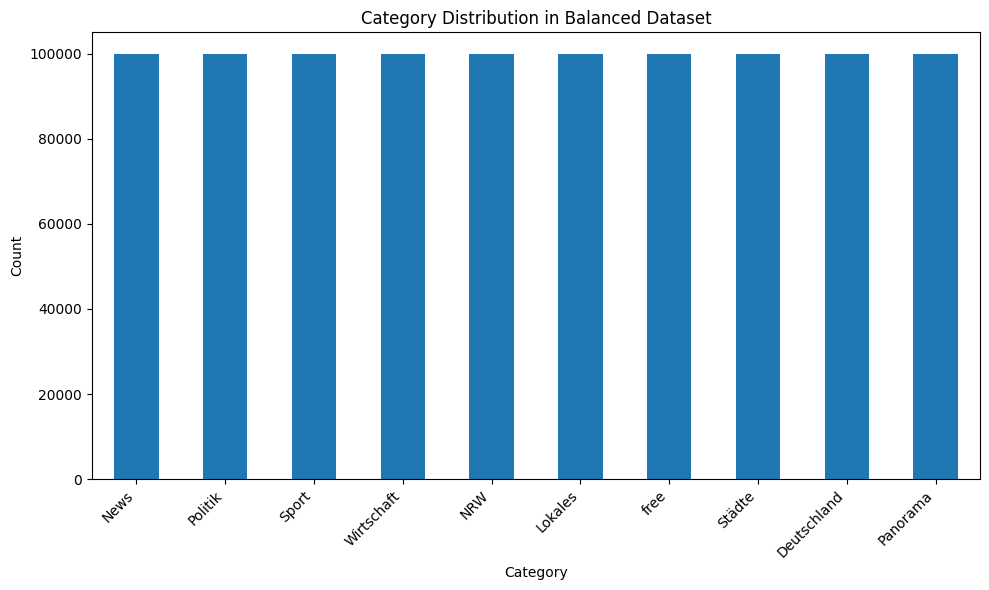

In [ ]:
def plot_category_distribution(df, label_column='category'):
    """
    Plots the distribution of categories in a bar chart.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the balanced dataset.
    - label_column (str): The name of the column containing the label/category.
    """
    # Get the category counts
    category_counts = df[label_column].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar')
    plt.title('Category Distribution in Balanced Dataset')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Assuming your balanced DataFrame is `balanced_df`
plot_category_distribution(balanced_df, label_column='category')

Conventional Classification

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming balanced_df is your balanced DataFrame
X = balanced_df['clean_text']  # Features (text data)
y = balanced_df['category']    # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
# Fit on the training data only
X_train_tfidf = tfidf.fit_transform(X_train)
# Transform the test set using the fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

# Initialize classifiers
classifiers = {
   "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
   "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
   # "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))



(800000, 5000)
(200000, 5000)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.64
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

 Deutschland       0.66      0.72      0.68     20000
     Lokales       0.78      0.85      0.81     20000
         NRW       0.50      0.37      0.42     20000
        News       0.61      0.45      0.52     20000
    Panorama       0.64      0.73      0.68     20000
     Politik       0.62      0.58      0.60     20000
       Sport       0.72      0.81      0.76     20000
      Städte       0.54      0.64      0.58     20000
  Wirtschaft       0.65      0.74      0.70     20000
        free       0.59      0.50      0.54     20000

    accuracy                           0.64    200000
   macro avg       0.63      0.64      0.63    200000
weighted avg       0.63      0.64      0.63    200000

K-Nearest Neighbors Accuracy: 0.79
Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

 Deutschland       0

Using Transformers: